<a href="https://colab.research.google.com/github/Somkesharwani/MachineLearning/blob/main/Apriori_Algorithm/Apriori%2BAlgorithm%2BComplete%2BCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apriori Algorithm Code Implementation

Hey everyone! Welcome to the doc on the implementation of the Apriori algorithm. Just a reminder, it is highly important that you brush up your concepts on how the algorithm works before you start implementing the algorithm in Python. Make sure you are familiar with the following keywords, as we will be using these terms frequently.

**1. Support**<br>
**2. Confidence**<br>
**3. Frequent Itemsets**<br>
**4. Rule Generation technique**<br>
**5. Candidate Generation**<br>
**6. Candidate Pruning**<br>

**Note:** It is highly recommended that you first try to implement the algorithm on your own from scratch. We understand how tempting it must be to scroll down and jump to the solution (which you might have already done by now).  Keep in mind that implementing the algorithm from scratch will not only improve your ability to write complex algorithms but also help you realise  the areas in Apriori that you might be weak in.

You can download the dataset from the link below <br>
(https://www.kaggle.com/roshansharma/market-basket-optimization). <br>

We have divided the code implementation into the following two parts:<br>
Part A: Frequent Itemset Generation<br>
Part B: Rule Generation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/Upgrade/notebook/Introduction_to_Machine_Learning_and_Cloud/Module_2/Session_3/

[Errno 2] No such file or directory: 'drive/MyDrive/Upgrade/notebook/Introduction_to_Machine_Learning_and_Cloud/Module_2/Session_3/'
/content/drive/MyDrive/Upgrade/notebook/Introduction_to_Machine_Learning_and_Cloud/Module_2/Session_3


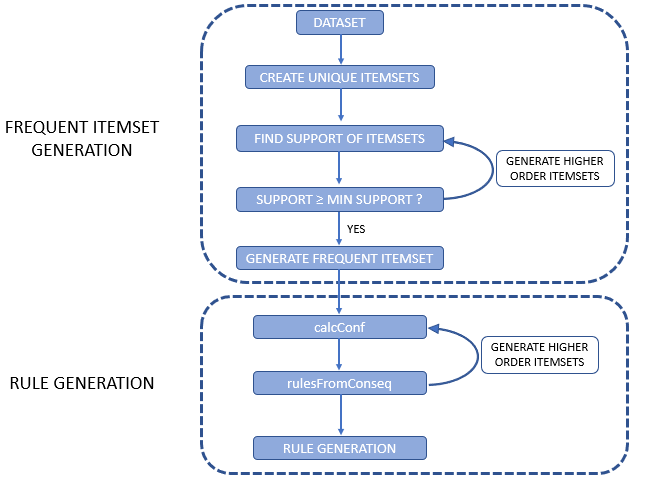

In [ ]:
Image('Apriori_Algorithm_Complete.png')

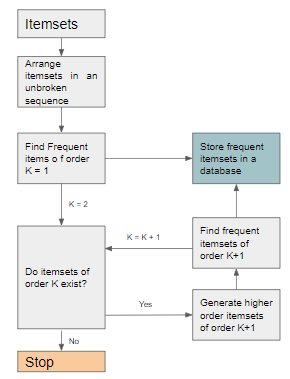

In [ ]:
Image('Frequent_Itemset_Generation.png')

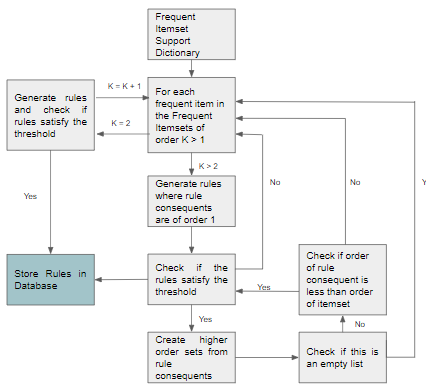

In [ ]:
Image('Rule_Generation.png')

## PART A: Frequent Itemset Generation

In [ ]:
import numpy as np 
import pandas as pd
from IPython.display import Image

In [ ]:
# Importing the libraries and the dataset

import pandas as pd

Market_Data = pd.read_csv('Market_Basket_Optimisation.csv',index_col=None, header = None ) # Use your local path here

Market_Data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Converting the Market Dataset into a nested list
Dataset = []

for index, transaction in Market_Data.iterrows():
    cleaned_transaction = transaction[~transaction.isnull()].tolist()
    Dataset.append(cleaned_transaction)

In [ ]:
len(Dataset) # Number of transactions in our dataset

7501

In [ ]:
# First 5 transactions of the dataset
Dataset[:5]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]

### 1. The createItem function
Each transaction consists of various items, and the entire dataset consists of 7,501 transactions. With the help of this function, you can generate all the unique items from the entire dataset.

In [ ]:
# For the given dataset writing a function to return the list of distinct items in the dataset

def createItem(dataSet):
    
    """
    This function extracts all the unique items from the entire dataset and sorts them (alphabetically)

    Attributes
    ----------
    dataSet : list
        Market dataset
    
    Return Types
    ---------
    frozen Itemlist : list
        frozen list of unique items
    """
    
    itemList = []
    
    for transaction in dataSet:
        for item in transaction:
            if not [item] in itemList:
                
                 # creating unique single lists in Itemlist. ie list of all items
                itemList.append([item])
                
   # itemList.sort()
    
    return list(map(frozenset, itemList))


Why have we used frozenset?

Frozenset simply freezes an iterable object, such as the one above, so that the order is immutable. Frozensets cannot be modified further. This property will later be applied while joining different itemset lists. We want the order to be maintained.

### 2. The scanData function

In [ ]:
# Returns an Itemset and dictionary with Support values

def scanData(data, itemsetk, minSupport):
    
    """
    As you know, support is the frequency of a particular item or itemset. 
    In order to calculate the support, we have created a supportDict dictionary.
    This stores the support value for each item set. 
    If the support value is greater than minsupport, we store the itemset in freqItemset. 
    Finally the function returns the ‘freqItemset’ and the ‘supportDict’. 
    
    Attributes
    ----------
    data : list
    List of frozensets

    itemsetk : Frozen set
    Note they can also be 2 item sets such as [a, b] or 3 item sets like []
    
    minSupport : float
    minimum support set by the user
    
    Return Types
    ---------
    freqItemset : Frozenset
    list of itemsets that satisfy the support threshold
    
    supportDict : dict
    Support values of each itemset
    
    """
    
    tempDict = {}
    
    for transaction in data:
        for item in itemsetk:
            if item.issubset(transaction):
                if not item in tempDict: 
                    tempDict[item]=1 # tempDict contains number of all items
                else: 
                    tempDict[item] += 1
    
    numItems = float(len(data))
    freqItemset = []
    supportDict = {}
    
    for key in tempDict:
        support = tempDict[key]/numItems 
        if support >= minSupport:
            freqItemset.insert(0,key) # freqItemset contains all frequent items
        supportDict[key] = support # contains support of all items
    
    return freqItemset, supportDict

In [ ]:
freqItemset1, supportDict = scanData(Dataset,list(map(frozenset, [['eggs', 'mineral water', 'spaghetti']])), 0.01)
freqItemset1


[frozenset({'eggs', 'mineral water', 'spaghetti'})]

In [ ]:
supportDict

{frozenset({'eggs', 'mineral water', 'spaghetti'}): 0.014264764698040262}

In [ ]:
itemset1 = createItem(Dataset) # Creating frozenset of items
    
    
# Generating all the frequent 1-itemsets and the support of those items
freqItemset1, supportDict = scanData(Dataset, itemset1, 0.01)

In [ ]:
print(freqItemset1)
print(supportDict)

[frozenset({'melons'}), frozenset({'fromage blanc'}), frozenset({'eggplant'}), frozenset({'nonfat milk'}), frozenset({'mushroom cream sauce'}), frozenset({'carrots'}), frozenset({'barbecue sauce'}), frozenset({'french wine'}), frozenset({'butter'}), frozenset({'mint'}), frozenset({'yogurt cake'}), frozenset({'cider'}), frozenset({'gums'}), frozenset({'light mayo'}), frozenset({'muffins'}), frozenset({'cereals'}), frozenset({'brownies'}), frozenset({'hot dogs'}), frozenset({'cake'}), frozenset({'strawberries'}), frozenset({'magazines'}), frozenset({'tomato sauce'}), frozenset({'herb & pepper'}), frozenset({'escalope'}), frozenset({'ground beef'}), frozenset({'fresh bread'}), frozenset({'parmesan cheese'}), frozenset({'white wine'}), frozenset({'grated cheese'}), frozenset({'pancakes'}), frozenset({'body spray'}), frozenset({'ham'}), frozenset({'rice'}), frozenset({'pepper'}), frozenset({'pasta'}), frozenset({'red wine'}), frozenset({'protein bar'}), frozenset({'extra dark chocolate'}), 

In [ ]:
itemsetk = itemSetGenerator(freqItemset1, 2) # Generating itemsets of order k
print(len(itemsetk))
        
        # Generating the frequent itemset for the kth order and support for each of these itemsets
freqItemset1, supportDictk = scanData(Dataset, itemsetk, 0.01)
print(len(freqItemset1))
print(freqItemset1)
print(supportDictk) 
        

2775
165
[frozenset({'milk', 'chicken'}), frozenset({'cake', 'pancakes'}), frozenset({'cake', 'frozen vegetables'}), frozenset({'green tea', 'tomatoes'}), frozenset({'whole wheat rice', 'french fries'}), frozenset({'french fries', 'ground beef'}), frozenset({'cookies', 'chocolate'}), frozenset({'salmon', 'chocolate'}), frozenset({'cake', 'green tea'}), frozenset({'cake', 'burgers'}), frozenset({'grated cheese', 'chocolate'}), frozenset({'eggs', 'escalope'}), frozenset({'pancakes', 'ground beef'}), frozenset({'french fries', 'frozen smoothie'}), frozenset({'shrimp', 'tomatoes'}), frozenset({'pancakes', 'olive oil'}), frozenset({'whole wheat rice', 'eggs'}), frozenset({'whole wheat rice', 'chocolate'}), frozenset({'shrimp', 'ground beef'}), frozenset({'milk', 'cooking oil'}), frozenset({'spaghetti', 'cooking oil'}), frozenset({'spaghetti', 'red wine'}), frozenset({'cake', 'milk'}), frozenset({'cake', 'chocolate'}), frozenset({'eggs', 'frozen smoothie'}), frozenset({'french fries', 'tomat

In [ ]:
itemsetk = itemSetGenerator(freqItemset1, 3) # Generating itemsets of order k
print(itemsetk)
        
        # Generating the frequent itemset for the kth order and support for each of these itemsets
freqItemset1, supportDictk = scanData(Dataset, itemsetk, 0.01)
print(freqItemset1)
print(supportDictk) 
        

[frozenset({'green tea', 'milk', 'chicken'}), frozenset({'french fries', 'milk', 'chicken'}), frozenset({'mineral water', 'milk', 'chicken'}), frozenset({'eggs', 'milk', 'chicken'}), frozenset({'milk', 'spaghetti', 'chicken'}), frozenset({'milk', 'chocolate', 'chicken'}), frozenset({'cake', 'pancakes', 'frozen vegetables'}), frozenset({'cake', 'pancakes', 'green tea'}), frozenset({'cake', 'pancakes', 'milk'}), frozenset({'cake', 'pancakes', 'chocolate'}), frozenset({'cake', 'pancakes', 'spaghetti'}), frozenset({'eggs', 'cake', 'pancakes'}), frozenset({'cake', 'pancakes', 'french fries'}), frozenset({'mineral water', 'cake', 'pancakes'}), frozenset({'cake', 'green tea', 'frozen vegetables'}), frozenset({'cake', 'milk', 'frozen vegetables'}), frozenset({'cake', 'chocolate', 'frozen vegetables'}), frozenset({'cake', 'spaghetti', 'frozen vegetables'}), frozenset({'eggs', 'cake', 'frozen vegetables'}), frozenset({'cake', 'french fries', 'frozen vegetables'}), frozenset({'mineral water', 'ca

In [ ]:
freqItemset1, supportDictk = scanData(Dataset, itemsetk, 0.01)

### 3. The itemSetGenerator function

This function takes a list of k-itemsets and returns all the k+1 item sets using candidate generation.Candidate Generation is the method of merging those k-item sets whose first (k-1) elements are identical

In [ ]:
# Creating Higher order Itemsets

def itemSetGenerator(itemsetk, k):
    
    """
    This function creates itemsets of order k by merging the input itemsets of order k-1)
    
    Attributes
    ----------
    itemsetk: list
        contains a frozen list of itemsets of (k-1)th order   
    k: int
        order of itemset we want to generate   
    
    Return Types
    ---------
    higherOrderitemset : list
        Merged itemsets
        
    """
        
    higherOrderitemset = []
    lenitemsetk = len(itemsetk)
    
    
    for i in range(lenitemsetk):
        for j in range(i+1, lenitemsetk): 
            L1 = sorted(list(itemsetk[i]))[:k-2]
            L2 = sorted(list(itemsetk[j]))[:k-2]
            #print(L1 , L2)
            L1.sort() 
            L2.sort()
            #print(L1 , L2)
            
            # Two frequent itemsets of order k are merged only if their k-1 itemsets are identical
            if L1 == L2:
                #print('Performing set union creates itemset with n+1 items',itemsetk[i] | itemsetk[j])
                higherOrderitemset.append(itemsetk[i] | itemsetk[j]) # Performing set union creates itemset with n+1 items
    #print(higherOrderitemset)           
    return higherOrderitemset

In [ ]:
Itemset3 = [frozenset({ 'a', 'b' , 'c' }), frozenset({'a', 'c' , 'd' }), frozenset({'b', 'c' , 'd' }),  frozenset({'b', 'c' , 'e' })]

itemSetGenerator(Itemset3, 4)

['a', 'b'] ['a', 'c']
['a', 'b'] ['a', 'c']
['a', 'b'] ['b', 'c']
['a', 'b'] ['b', 'c']
['a', 'b'] ['b', 'c']
['a', 'b'] ['b', 'c']
['a', 'c'] ['b', 'c']
['a', 'c'] ['b', 'c']
['a', 'c'] ['b', 'c']
['a', 'c'] ['b', 'c']
['b', 'c'] ['b', 'c']
['b', 'c'] ['b', 'c']
Performing set union creates itemset with n+1 items frozenset({'d', 'c', 'b', 'e'})
[frozenset({'d', 'c', 'b', 'e'})]


[frozenset({'b', 'c', 'd', 'e'})]

### 4. The frquentItemsetGeneration function
All the functions that we have created until now will come into play in the frquentItemsetGeneration function. All the possible k-order itemsets will be generated, and the support will be calculated for each itemset. Consequently, the freqItemsets of all orders will be stored and returned.

#### Description:

We use the ‘createItem’ function to extract all the unique items and store them as a frozenset. Next we scan these 1-itemsets, generate all the frequent itemsets and store them in 'freqItemsets'. Following this, we generate higher order itemsets until we are no longer able to find any itemsets of the kth order.

In [ ]:
def frquentItemsetGeneration(dataSet, minSupport):
    
    """"
    The apriori function generates all the frequent itemsets and the support values for each possible itemset.
    The reason for storing all the support values is that it will be used later for Rule Generation
    
    Attributes
    ----------
    dataSet: list
        The list of all transactions created before creating the functions.
    minSupport: float
        Since minSupport is completed upto the user, we have assumed the minSupport as 0.01 for the Market_Data dataset.
    
    Return Types
    ---------
    freqItemsets : list
         All possible frequent itemsets (for all values of order k)
    supportDict : dict
        support of all the itemsets
        
    """
    itemset1 = createItem(dataSet) # Creating frozenset of items
    
    
    # Generating all the frequent 1-itemsets and the support of those items
    freqItemset1, supportDict = scanData(dataSet, itemset1, minSupport)
    
    freqItemsets = [freqItemset1]
    k = 2 
    
    while (len(freqItemsets[k-2]) > 0): # Incrementing k until we no longer find any kth order itemsets
        
        itemsetk = itemSetGenerator(freqItemsets[k-2], k) # Generating itemsets of order k
        
        # Generating the frequent itemset for the kth order and support for each of these itemsets
        freqItemsetk, supportDictk = scanData(dataSet, itemsetk, minSupport) 
        
        supportDict.update(supportDictk)
        freqItemsets.append(freqItemsetk)
        
        k += 1
    return freqItemsets, supportDict

In [ ]:
freqItemsets, supportDict = frquentItemsetGeneration(Dataset, minSupport = 0.01)

In [ ]:
freqItemsets

In [ ]:
#itemL={'chocolate','mineral water'}
#item.sort()
search={'chocolate','mineral water'}


In [ ]:
count=0
for trans in freqItemsets:
  for j in trans:
    if search.issubset(j):
      print(j)
      count+=1
print(count)

frozenset({'mineral water', 'chocolate'})
frozenset({'mineral water', 'spaghetti', 'chocolate'})
frozenset({'mineral water', 'ground beef', 'chocolate'})
frozenset({'mineral water', 'milk', 'chocolate'})
frozenset({'mineral water', 'chocolate', 'eggs'})
5


In [ ]:
|supportDict

{frozenset({'shrimp'}): 0.07145713904812692,
 frozenset({'almonds'}): 0.020397280362618318,
 frozenset({'avocado'}): 0.03332888948140248,
 frozenset({'vegetables mix'}): 0.025729902679642713,
 frozenset({'green grapes'}): 0.009065457938941474,
 frozenset({'whole weat flour'}): 0.009332089054792695,
 frozenset({'yams'}): 0.011465137981602452,
 frozenset({'cottage cheese'}): 0.03186241834422077,
 frozenset({'energy drink'}): 0.026663111585121985,
 frozenset({'tomato juice'}): 0.030395947207039063,
 frozenset({'low fat yogurt'}): 0.07652313024930009,
 frozenset({'green tea'}): 0.13211571790427942,
 frozenset({'honey'}): 0.047460338621517134,
 frozenset({'salad'}): 0.004932675643247567,
 frozenset({'mineral water'}): 0.23836821757099053,
 frozenset({'salmon'}): 0.04252766297826956,
 frozenset({'antioxydant juice'}): 0.008932142381015865,
 frozenset({'frozen smoothie'}): 0.06332489001466471,
 frozenset({'spinach'}): 0.007065724570057326,
 frozenset({'olive oil'}): 0.0658578856152513,
 froze

In [ ]:
# Frequent Itemsets of order 3
# Similarly you can extract the other itemsets as well
freqItemsets[2]

[frozenset({'french fries', 'mineral water', 'spaghetti'}),
 frozenset({'eggs', 'milk', 'mineral water'}),
 frozenset({'eggs', 'ground beef', 'mineral water'}),
 frozenset({'chocolate', 'eggs', 'spaghetti'}),
 frozenset({'mineral water', 'olive oil', 'spaghetti'}),
 frozenset({'chocolate', 'mineral water', 'spaghetti'}),
 frozenset({'chocolate', 'ground beef', 'mineral water'}),
 frozenset({'chocolate', 'milk', 'mineral water'}),
 frozenset({'chocolate', 'milk', 'spaghetti'}),
 frozenset({'frozen vegetables', 'milk', 'mineral water'}),
 frozenset({'frozen vegetables', 'mineral water', 'spaghetti'}),
 frozenset({'chocolate', 'eggs', 'mineral water'}),
 frozenset({'milk', 'mineral water', 'spaghetti'}),
 frozenset({'ground beef', 'mineral water', 'spaghetti'}),
 frozenset({'ground beef', 'milk', 'mineral water'}),
 frozenset({'mineral water', 'pancakes', 'spaghetti'}),
 frozenset({'eggs', 'mineral water', 'spaghetti'})]

**Congratulations! You now have your frequent itemsets. Let’s move on to Rule Generation. Hope you had no trouble following the implementation until now. If at any point you felt that your concepts were weak or you were not able to follow the code or text, you can revise your concepts from the session on apriori algorithm.**

## PART B: Rule Generation

### 5. The ‘calcConf’ function

As you may have guessed, this function takes in a frequent itemset and calculates the confidence for each rule that it generates. <br>

As you know, a rule is made of an antecedent and a consequent. The general structure of a rule is given below:<br>
&emsp; (Rule antecedent) ----> (Rule consequent) <br>

Recall the definition of confidence. For a given rule (a, b)--->(c, d), the confidence is calculated as follows::<br>
&emsp; conf((a, b)--->(c, d)) = support(a, b, c, d)/ support(a, b)<br>

In other words, it is (support of frequent itemset)/ (support of (frequent itemset - consequent))<br>

Notice how the same formula is used in the code?<br>

In [ ]:
def calcConf(freqSet, H, supportDict, bigRuleList, minConf):

    """"
    For each conseq in H, this function generates rules and calculates its confidence
    If the confidence is greater than minconf, we store the rule. We also store their rule consequents in prunedH.
    
    Attributes
    ----------
    freqSet: list
        frequent itemset (We have already generated the frequent itemsets in PART A) 
        eg. frozenset({'french fries', 'mineral water', 'spaghetti'})
        
    H: list
        Combinations of items stored in freqset
        eg. For the freqSet example shown above, H can be 
            [frozenset({'french fries'}), frozenset({'spaghetti'}), frozenset({'mineral water'})]
            or
            [frozenset({'french fries', 'spaghetti'}), 
            frozenset({'french fries', 'mineral water'}), 
            frozenset({'spaghetti', 'mineral water'})]
            
    supportDict: dict
        Support Values of all the possible generated until now
        
    bigRuleList: list
        All our rules will be stored in this list and will be updated every time the function is executed
    
    minConf: float
        minimum confidence

    
    Return Types
    ---------
    prunedH : list
          Contains those consequents whose rules had a confidence higher than minconf
        
    """
        
    prunedH = []
    
    for conseq in H:
        
        conf = supportDict[freqSet]/supportDict[freqSet - conseq] # calculate confidence
        
        if conf >= minConf:
            bigRuleList.append((freqSet-conseq, conseq, conf))
            print(freqSet-conseq, '--->', conseq, 'confidence = ', conf)
            prunedH.append(conseq)
            
    return prunedH

### 6. The rulesFromConseq function

Later on, we use the condition that the order of each consequent will always be less than the order of the frequent itemset. If True, we want to generate new rules where the itemsets in Hmp1 are used as rule consequents.<br>
<br>
**Q) Now why does calcConf return prunedH and not H?**<br><br>
Here, we have used confidence-based pruning.<br>
Let’s consider generating rules for the itemset {a, b, c, d}
<br><br>
Suppose the confidence for {b, c, d} ---> {a} is less than the threshold. We can eliminate all the rules in which the rule consequent consists of higher-item sets containing {a}<br><br>

Thus, we can eliminate {b, d} → {a, c}, {c, d} → {a, b}, {b, c} → {a, d}, {d} → {a, b, c}<br>

Now suppose {b, c, d} ---> {a} does not satisfy the threshold. In this case, we eliminate {a} from the rule consequent, so that our algorithm does not have to create higher order itemsets of {a}, and check their thresholds as well.

In [ ]:
def rulesFromConseq(freqSet, H, supportDict, bigRuleList, minConf):
    
    """"
    This function generates rules for itemsets of order > 2
    
    Attributes
    ----------
    freqSet: list
        frequent itemset
        
    H: list
        Combinations of items stored in freqset
            
    supportDict: dict
        Support Values of all the possible generated until now
        
    bigRuleList: list
        All our rules will be stored in this list and will be updated every time the function is executed
    
    minConf: float
        minimum confidence
        
    """

    m = len(H[0]) # Order of the consequent while generating the rules
         
    H = calcConf(freqSet, H, supportDict, bigRuleList, minConf)
    if len(H)>1: # For len(H)<=1, you cannot generate higher order cadnidates
        
        # creating higher order candidates
        Hmp1 = itemSetGenerator(H, m+1) 
        
        if Hmp1 == []: 
            # Hmp1 will be an empty list if the itemsets in H don't satisfy the condition for merging.
            # Thus higher item set consequent will not be generated and the function will be terminated
            return 0
        
        if (len(Hmp1[0]) < len(freqSet)):
            # Generate rules while the order of the itemsets in Hmp1 is less than the number of items in the frequent itemset
            rulesFromConseq(freqSet, Hmp1, supportDict, bigRuleList, minConf)

### 7. The generateRules function
Consider this the final function for Rule Generation. We have our functions and all we need to do is extract the frequent itemsets and generate the rules with the help of our functions.

**Description:**<br>
We will begin by initialising the bigRuleList to an empty list. Now, we will form a nested loop runs through all the frequent itemsets in the ‘freqItemsets’ created in PART A. As explained earlier, we start with H1 consisting of all the order one combinations of the items in ‘freqSet’. If the order of ‘freqSet’ is two, i.e., i = 1, then there is no need to create higher order itemsets from its subsets. Hence, we directly generate the rules by calling ‘calcConf’. Once i>1, we need to break the freqSet into its subsets and generate different combinations of the rules. We have already shown the working in the explanation of the ‘rulesFromConseq’ function. Once you have all your rules in the ‘bigRuleList’, you can print them.

In [ ]:
def generateRules(freqItemsets, supportDict, minConf):  #supportDict is a dictionary coming from scanData
    
    """"
    For each conseq in H, this function creates a rule and the confidence is calculated. 
    If the confidence is greater than minconf, we store the rule. We also store the rule consequents in prunedH.
    
    Attributes
    ----------
    freqItemsets: list
        Frequent Itemsets generated from PART A
        eg. frozenset({'french fries', 'mineral water', 'spaghetti'})
    supportDict: dict
        Support Dictionary created in PART A
    minConf: float
        minimum confidence set by the user
    
    Return Types
    ---------
    bigRuleList : list
          Contains all the rules whose confidence is greater than minConf
        
    """
    bigRuleList = []
    for i in range(1, len(freqItemsets)): # Only get the sets with two or more items
        for freqSet in freqItemsets[i]:
            H1 = [frozenset([item]) for item in freqSet]  
            if (i > 1):
                rulesFromConseq(freqSet, H1, supportDict, bigRuleList, minConf)
            else:
                calcConf(freqSet, H1, supportDict, bigRuleList, minConf)
    return bigRuleList 

In [ ]:
final_rules = generateRules(freqItemsets, supportDict, 0.3)

frozenset({'cooking oil'}) ---> frozenset({'spaghetti'}) confidence =  0.31070496083550914
frozenset({'red wine'}) ---> frozenset({'spaghetti'}) confidence =  0.36492890995260663
frozenset({'fresh bread'}) ---> frozenset({'mineral water'}) confidence =  0.30959752321981426
frozenset({'herb & pepper'}) ---> frozenset({'spaghetti'}) confidence =  0.32884097035040427
frozenset({'grated cheese'}) ---> frozenset({'mineral water'}) confidence =  0.3333333333333333
frozenset({'grated cheese'}) ---> frozenset({'spaghetti'}) confidence =  0.3155216284987277
frozenset({'herb & pepper'}) ---> frozenset({'mineral water'}) confidence =  0.34501347708894875
frozenset({'herb & pepper'}) ---> frozenset({'ground beef'}) confidence =  0.3234501347708895
frozenset({'soup'}) ---> frozenset({'mineral water'}) confidence =  0.45646437994722955
frozenset({'olive oil'}) ---> frozenset({'spaghetti'}) confidence =  0.3481781376518219
frozenset({'cereals'}) ---> frozenset({'mineral water'}) confidence =  0.39896

**Congratulations! You now have your rules and you can experiment with this algorithm on other market data sets as well. We hope this explanation was helpful and all of your concepts related to the Apriori algorithm have been cleared.**

In [ ]:
H = [frozenset({'bread', 'eggs'}), frozenset({'cheese', 'milk'}), frozenset({'bread', 'milk'})]

rulesFromConseq(freqSet = frozenset ({bread, eggs, milk, cheese}), H, supportDict, bigRuleList = [], minConf = 0)

SyntaxError: ignored